# 畳み込みニューラルネットワーク (Convolutional Neural Networks)

In [2]:
import tensorflow as tf

from tensorflow.keras import layers, models
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt

### MNISTデータセットのダウンロードと準備

CIFAR10 データセットには、10 のクラスに 60,000 のカラー画像が含まれ、各クラスに 6,000 の画像が含まれています。 データセットは、50,000 のトレーニング画像と 10,000 のテスト画像に分割されています。クラスは相互に排他的であり、それらの間に重複はありません。

In [3]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

4431872/4422102 [==============================] - 0s 0us/step


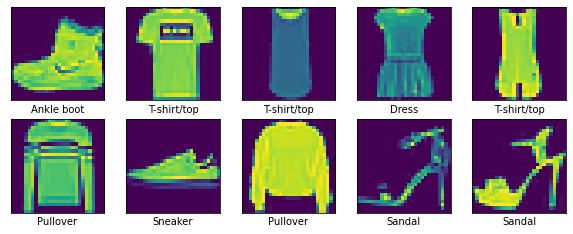

In [66]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i]])
plt.show()

### 畳み込みの基礎部分の作成

下記の6行のコードは、一般的なパターンで畳み込みの基礎部分を定義しています: [Conv2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D) と [MaxPooling2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D) レイヤーのスタック。

入力として、CNNはバッチサイズを無視して、形状（image_height、image_width、color_channels）のテンソルを取ります。これらのディメンションを初めて使用する場合、color_channelsは（R,G,B）を参照します。 この例では、CIFAR　画像の形式である形状（32, 32, 3）の入力を処理するようにCNNを構成します。これを行うには、引数`input_shape`を最初のレイヤーに渡します。


In [7]:
train_images.shape


(60000, 28, 28)

In [8]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28,28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
Total params: 55,744
Trainable params: 55,744
Non-traina

In [10]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

In [12]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 18s 3ms/step - loss: 0.5099 - accuracy: 0.8108 - val_loss: 0.4063 - val_accuracy: 0.8509
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3273 - accuracy: 0.8811 - val_loss: 0.3208 - val_accuracy: 0.8860
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2793 - accuracy: 0.8972 - val_loss: 0.3055 - val_accuracy: 0.8911
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2474 - accuracy: 0.9087 - val_loss: 0.2746 - val_accuracy: 0.8979
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2239 - accuracy: 0.9174 - val_loss: 0.2673 - val_accuracy: 0.9011
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2046 - accuracy: 0.9240 - val_loss: 0.2761 - val_accuracy: 0.8991
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1872 - accuracy: 0.9304 - val_loss: 0.2807 - val_accuracy

### モデルの評価

313/313 - 1s - loss: 0.2798 - accuracy: 0.9070 - 621ms/epoch - 2ms/step


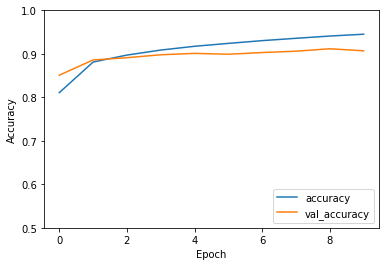

In [13]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [14]:
print(test_acc)

0.9070000052452087


この単純な CNN は、 数行のコードで 70％ を超えるテスト精度を達成しています。別の CNN スタイルについては、Keras サブクラス化 API と{`tf.GradientTape`を使用する[ 上級者向け TensorFlow 2 クイックスタート](https://www.tensorflow.org/tutorials/quickstart/advanced)の例を参照してください。